In [1]:
import pandas as pd
import openpyxl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 패치
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# %matplotlib inline 
get_ipython().run_line_magic("matplotlib", "inline")

In [2]:
df_18 = pd.read_excel('18_공실률.xls')
df_19 = pd.read_excel('19_공실률.xls')
df_20 = pd.read_excel('20_공실률.xls')
df_21 = pd.read_excel('21_공실률.xls')

In [4]:
df_18 = df_18[['하위상권', '공실률']]
df_19 = df_19[['하위상권', '공실률']]
df_20 = df_20[['하위상권', '공실률']]
df_21 = df_21[['하위상권', '공실률']]

In [6]:
coB = pd.merge(df_18, df_19, on='하위상권')
coA = pd.merge(df_20, df_21, on='하위상권')

In [9]:
coB = coB.drop(coB.index[2:])
coA = coA.drop(coA.index[2:])

In [13]:
coB = coB.drop(coB.index[0])
coA = coA.drop(coA.index[0])

In [14]:
coB['평균'] = coB.iloc[:, 1:].mean(axis=1)
coA['평균'] = coA.iloc[:, 1:].mean(axis=1)

In [16]:
coB.columns = ['지역', 'x', 'y', '평균']
coA.columns = ['지역', 'x', 'y', '평균']

In [17]:
coB = coB[['지역', '평균']]
coA = coA[['지역', '평균']]
coB
coA

,지역,평균
1,서울,10.25


,지역,평균
1,서울,8.2


In [19]:
co_all = pd.read_csv('전체 공실률.csv')

In [20]:
co_all = co_all.drop('Unnamed: 0', 1)
co_all

C:\Users\82103\AppData\Local\Temp/ipykernel_21524/2415873158.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  co_all = co_all.drop('Unnamed: 0', 1)


,지역,평균,covid
0,광화문,7.50,before
1,동대문,9.35,before
2,명동,9.35,before
3,명동,9.35,before
4,충무로,20.00,before
5,강남대로,14.00,before
6,논현역,3.65,before
7,도산대로,9.50,before
8,테헤란로,6.70,before
9,테헤란로,6.70,after


In [21]:
cov = pd.concat([coB, coA])
cov

,지역,평균
1,서울,10.25
1,서울,8.20


In [22]:
data = pd.DataFrame({
    '평균' : cov['평균'],
    'covid' : 'before'
})
data

,평균,covid
1,10.25,before
1,8.20,before


In [23]:
data.iloc[1, 1] = 'after'
data

,평균,covid
1,10.25,before
1,8.20,after


In [24]:
covid = pd.merge(cov, data, on='평균')
covid

,지역,평균,covid
0,서울,10.25,before
1,서울,8.20,after


In [25]:
co_all = pd.concat([co_all, covid])
co_all

,지역,평균,covid
0,광화문,7.50,before
1,동대문,9.35,before
2,명동,9.35,before
3,명동,9.35,before
4,충무로,20.00,before
5,강남대로,14.00,before
6,논현역,3.65,before
7,도산대로,9.50,before
8,테헤란로,6.70,before
9,테헤란로,6.70,after


<Figure size 1080x720 with 0 Axes>

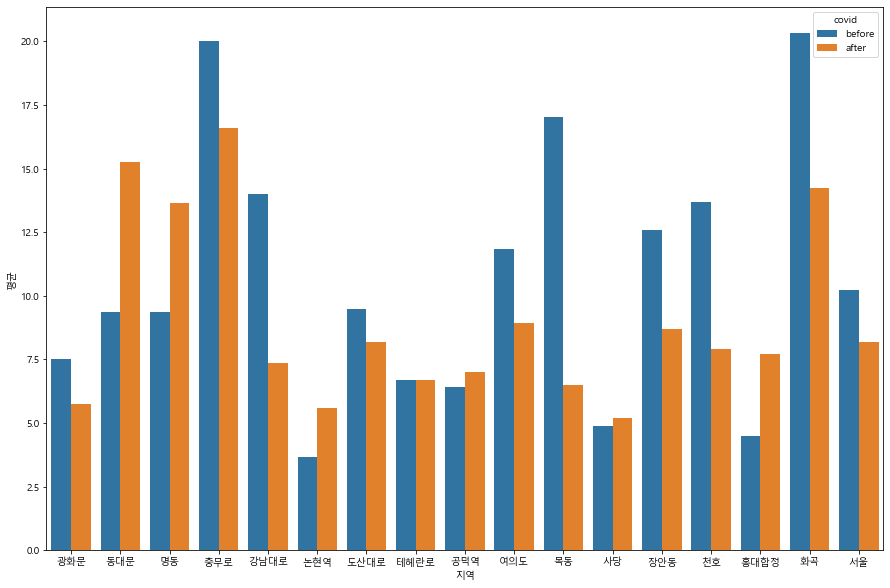

In [27]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=co_all, x='지역', y='평균', hue='covid')
plt.show()
sfig = splot.get_figure()
sfig.savefig('서울 전체 포함 공실률 최종.png')